<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/10-neural-networks/03_neural_network_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural network image recognition

In this notebook, we learn how to train a neural network for image recognition. 

The dataset we use
is MNIST, a popular dataset for image recognition, which contains 70,000 handwritten digits
from 0 to 9. The label of each image is the corresponding digit. 

Each grayscale image comes as a
28-by-28 matrix of numbers between 0 and 255, where 0 represents white, 255 represents black,
and any number in between represents a shade of gray.

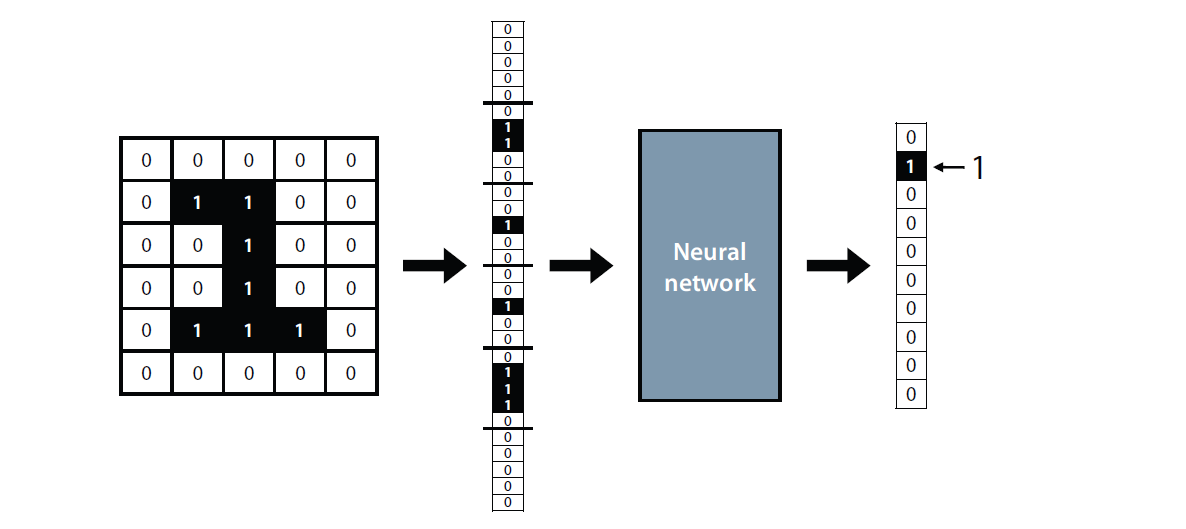

##Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
# Setting random seeds to get reproducible results
np.random.seed(0)
tf.random.set_seed(1)

##Dataset

Before we train the model, let’s load and preprocess the data.

In [4]:
# Loading  dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Size of the training set: {len(x_train)}")
print(f"Size of the testing set: {len(x_test)}")

Size of the training set: 60000
Size of the testing set: 10000


The label is 2


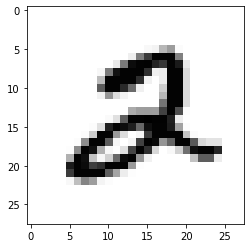

In [5]:
# let's plot a data points
plt.imshow(x_train[5], cmap="Greys")
print(f"The label is {y_train[5]}")

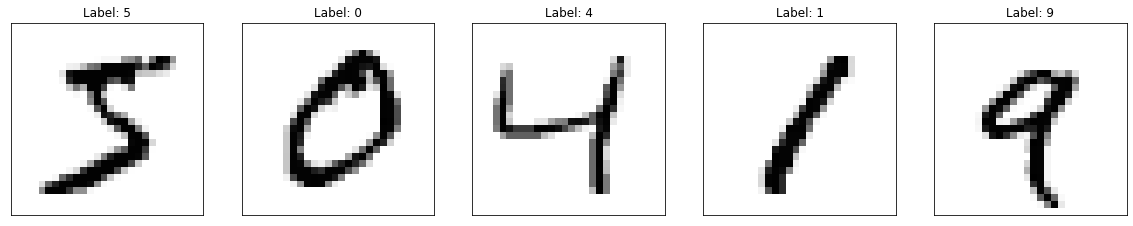

In [9]:
# let's see the first five images in the dataset with their labels
fig = plt.figure(figsize=(20, 20))
for i in range(5):
  ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(x_train[i], cmap="Greys")
  ax.set_title(f"Label: {str(y_train[i])}")
plt.show()

Let's do the reshaping of the features.

In the reshape function we use the -1 as a placeholder for the size of the dataset.

In [10]:
x_train_reshaped = x_train.reshape(-1, 28 * 28)
x_test_reshaped = x_test.reshape(-1, 28 * 28)

Because the label is a number
between 0 and 9, we must turn that into a vector of length 10, in which the entry corresponding
to the label is a 1 and the rest are 0.

Let's categorize the label.

In [11]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

##Neural network architecture

In [ ]:
# Building the model
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(2, )))
model.add(Dropout(.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(.2))
model.add(Dense(2, activation="softmax"))

# Compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 8,770
Trainable params: 8,770
Non-trainable params: 0
_________________________________________________________________


##Training the neural network

Let's train the model.

In [ ]:
model.fit(X, cat_y, epochs=100, batch_size=10)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7182
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.7636
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7636
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.7636
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7636
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7636
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7636
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.7636
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.7636
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.7636
Epoch 11/

The final accuracy of the model on the training is 0.9.

Let's plot the boundary of of the neural network.

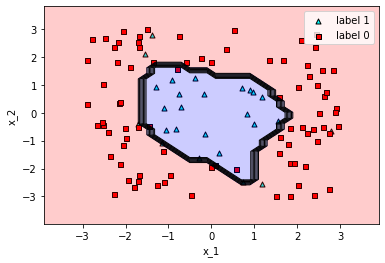

In [ ]:
utils.plot_model(X, y, model)

Note that the model managed to classify the data pretty well, encircling the triangles and leaving the squares outside. 

It made some mistakes, due to noisy data, but this is OK. 

The rigged boundary hints to small levels of overfitting, but in general it seems like a good model.